# 베스트 모델 만들기 - 와인 사례

## 이진 분류

### 자동 중단

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 입력
df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [8]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [9]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,verbose=1, callbacks=[early_stopping_callback, checkpointer_callback])

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
 500/4352 [==>...........................] - ETA: 2s - loss: 0.8984 - accuracy: 0.7600
Epoch 00001: val_loss improved from inf to 0.37647, saving model to ./model/final001-0.3765.hdf5
4352/4352 [==============================] - 0s 107us/sample - loss: 0.5590 - accuracy: 0.7626 - val_loss: 0.3765 - val_accuracy: 0.8336
Epoch 2/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8500
Epoch 00002: val_loss improved from 0.37647 to 0.29493, saving model to ./model/final002-0.2949.hdf5
4352/4352 [==============================] - 0s 13us/sample - loss: 0.3619 - accuracy: 0.8727 - val_loss: 0.2949 - val_accuracy: 0.8928
Epoch 3/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.3537 - accuracy: 0.8840
Epoch 00003: val_loss improved from 0.29493 to 0.27824, saving model to ./model/final003-0.2782.hdf5
4352/4352 [==============================] - 0s 14us/sample - loss: 0.3201 - acc

 500/4352 [==>...........................] - ETA: 0s - loss: 0.2283 - accuracy: 0.9300
Epoch 00026: val_loss improved from 0.17482 to 0.17446, saving model to ./model/final026-0.1745.hdf5
4352/4352 [==============================] - 0s 15us/sample - loss: 0.1893 - accuracy: 0.9338 - val_loss: 0.1745 - val_accuracy: 0.9427
Epoch 27/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1884 - accuracy: 0.9420
Epoch 00027: val_loss improved from 0.17446 to 0.17410, saving model to ./model/final027-0.1741.hdf5
4352/4352 [==============================] - 0s 14us/sample - loss: 0.1882 - accuracy: 0.9354 - val_loss: 0.1741 - val_accuracy: 0.9431
Epoch 28/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.2018 - accuracy: 0.9200
Epoch 00028: val_loss improved from 0.17410 to 0.17247, saving model to ./model/final028-0.1725.hdf5
4352/4352 [==============================] - 0s 17us/sample - loss: 0.1869 - accuracy: 0.9350 - val_loss: 0.1725 - val_accuracy: 0.9431


4352/4352 [==============================] - 0s 8us/sample - loss: 0.1511 - accuracy: 0.9455 - val_loss: 0.1451 - val_accuracy: 0.9487
Epoch 52/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1562 - accuracy: 0.9380
Epoch 00052: val_loss did not improve from 0.14511
4352/4352 [==============================] - 0s 4us/sample - loss: 0.1492 - accuracy: 0.9458 - val_loss: 0.1519 - val_accuracy: 0.9459
Epoch 53/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1626 - accuracy: 0.9300
Epoch 00053: val_loss did not improve from 0.14511
4352/4352 [==============================] - 0s 4us/sample - loss: 0.1504 - accuracy: 0.9446 - val_loss: 0.1488 - val_accuracy: 0.9473
Epoch 54/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9460
Epoch 00054: val_loss improved from 0.14511 to 0.14389, saving model to ./model/final054-0.1439.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.1482 - accuracy: 0.9

4352/4352 [==============================] - 0s 8us/sample - loss: 0.1182 - accuracy: 0.9547 - val_loss: 0.1193 - val_accuracy: 0.9604
Epoch 78/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1419 - accuracy: 0.9480
Epoch 00078: val_loss improved from 0.11931 to 0.11890, saving model to ./model/final078-0.1189.hdf5
4352/4352 [==============================] - 0s 23us/sample - loss: 0.1176 - accuracy: 0.9584 - val_loss: 0.1189 - val_accuracy: 0.9604
Epoch 79/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1476 - accuracy: 0.9540
Epoch 00079: val_loss improved from 0.11890 to 0.11647, saving model to ./model/final079-0.1165.hdf5
4352/4352 [==============================] - 0s 13us/sample - loss: 0.1168 - accuracy: 0.9577 - val_loss: 0.1165 - val_accuracy: 0.9608
Epoch 80/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0942 - accuracy: 0.9720
Epoch 00080: val_loss improved from 0.11647 to 0.11406, saving model to ./model/final080

Epoch 104/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0689 - accuracy: 0.9740
Epoch 00104: val_loss did not improve from 0.09766
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0968 - accuracy: 0.9690 - val_loss: 0.0985 - val_accuracy: 0.9711
Epoch 105/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0841 - accuracy: 0.9800
Epoch 00105: val_loss did not improve from 0.09766
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0988 - accuracy: 0.9690 - val_loss: 0.0977 - val_accuracy: 0.9702
Epoch 106/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1147 - accuracy: 0.9580
Epoch 00106: val_loss improved from 0.09766 to 0.09596, saving model to ./model/final106-0.0960.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0970 - accuracy: 0.9688 - val_loss: 0.0960 - val_accuracy: 0.9697
Epoch 107/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0955 - a

Epoch 132/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9780
Epoch 00132: val_loss improved from 0.08659 to 0.08384, saving model to ./model/final132-0.0838.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0833 - accuracy: 0.9763 - val_loss: 0.0838 - val_accuracy: 0.9762
Epoch 133/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0698 - accuracy: 0.9840
Epoch 00133: val_loss did not improve from 0.08384
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0835 - accuracy: 0.9747 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 134/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0981 - accuracy: 0.9740
Epoch 00134: val_loss improved from 0.08384 to 0.08205, saving model to ./model/final134-0.0821.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.0821 - val_accuracy: 0.9767
Epoch 135/3500
 500/4352 [==>.......

 500/4352 [==>...........................] - ETA: 0s - loss: 0.1299 - accuracy: 0.9640
Epoch 00159: val_loss improved from 0.07718 to 0.07535, saving model to ./model/final159-0.0754.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0747 - accuracy: 0.9798 - val_loss: 0.0754 - val_accuracy: 0.9776
Epoch 160/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0793 - accuracy: 0.9760
Epoch 00160: val_loss did not improve from 0.07535
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0747 - accuracy: 0.9793 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 161/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0586 - accuracy: 0.9860
Epoch 00161: val_loss did not improve from 0.07535
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0753 - accuracy: 0.9782 - val_loss: 0.0870 - val_accuracy: 0.9748
Epoch 162/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0842 - accuracy: 0.9680

Epoch 186/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0809 - accuracy: 0.9760
Epoch 00186: val_loss improved from 0.06860 to 0.06792, saving model to ./model/final186-0.0679.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0690 - accuracy: 0.9802 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 187/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0410 - accuracy: 0.9860
Epoch 00187: val_loss did not improve from 0.06792
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0682 - accuracy: 0.9802 - val_loss: 0.0756 - val_accuracy: 0.9795
Epoch 188/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0724 - accuracy: 0.9800
Epoch 00188: val_loss did not improve from 0.06792
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0687 - accuracy: 0.9802 - val_loss: 0.0720 - val_accuracy: 0.9809
Epoch 189/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0549 - a

Epoch 213/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9820
Epoch 00213: val_loss did not improve from 0.06331
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0630 - accuracy: 0.9832 - val_loss: 0.0638 - val_accuracy: 0.9804
Epoch 214/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0366 - accuracy: 0.9900
Epoch 00214: val_loss did not improve from 0.06331
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0629 - accuracy: 0.9832 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 215/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0519 - accuracy: 0.9780
Epoch 00215: val_loss improved from 0.06331 to 0.06237, saving model to ./model/final215-0.0624.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0627 - accuracy: 0.9828 - val_loss: 0.0624 - val_accuracy: 0.9809
Epoch 216/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0778 - a

Epoch 240/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0607 - accuracy: 0.9800
Epoch 00240: val_loss improved from 0.05987 to 0.05964, saving model to ./model/final240-0.0596.hdf5
4352/4352 [==============================] - 0s 8us/sample - loss: 0.0598 - accuracy: 0.9828 - val_loss: 0.0596 - val_accuracy: 0.9823
Epoch 241/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0623 - accuracy: 0.9800
Epoch 00241: val_loss did not improve from 0.05964
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0607 - accuracy: 0.9830 - val_loss: 0.0608 - val_accuracy: 0.9818
Epoch 242/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0527 - accuracy: 0.9840
Epoch 00242: val_loss did not improve from 0.05964
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0591 - accuracy: 0.9846 - val_loss: 0.0614 - val_accuracy: 0.9828
Epoch 243/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0712 - a

Epoch 267/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0404 - accuracy: 0.9840
Epoch 00267: val_loss did not improve from 0.05709
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0581 - accuracy: 0.9837 - val_loss: 0.0596 - val_accuracy: 0.9846
Epoch 268/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9820
Epoch 00268: val_loss did not improve from 0.05709
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 269/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0499 - accuracy: 0.9840
Epoch 00269: val_loss did not improve from 0.05709
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0620 - accuracy: 0.9825 - val_loss: 0.0698 - val_accuracy: 0.9804
Epoch 270/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0668 - accuracy: 0.9880
Epoch 00270: val_loss did not impr

Epoch 295/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0668 - accuracy: 0.9760
Epoch 00295: val_loss did not improve from 0.05565
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0590 - accuracy: 0.9832 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 296/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0519 - accuracy: 0.9900
Epoch 00296: val_loss did not improve from 0.05565
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0575 - accuracy: 0.9844 - val_loss: 0.0561 - val_accuracy: 0.9851
Epoch 297/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0290 - accuracy: 0.9900
Epoch 00297: val_loss did not improve from 0.05565
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0614 - accuracy: 0.9844 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 298/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0392 - accuracy: 0.9840
Epoch 00298: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0458 - accuracy: 0.9860
Epoch 00323: val_loss did not improve from 0.05448
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0560 - accuracy: 0.9853 - val_loss: 0.0552 - val_accuracy: 0.9851
Epoch 324/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0555 - accuracy: 0.9840
Epoch 00324: val_loss did not improve from 0.05448
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0552 - accuracy: 0.9846 - val_loss: 0.0548 - val_accuracy: 0.9851
Epoch 325/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0358 - accuracy: 0.9900
Epoch 00325: val_loss improved from 0.05448 to 0.05421, saving model to ./model/final325-0.0542.hdf5
4352/4352 [==============================] - 0s 10us/sample - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 326/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0454 - accuracy: 0.990

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0972 - accuracy: 0.9740
Epoch 00350: val_loss did not improve from 0.05284
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0532 - accuracy: 0.9858 - val_loss: 0.0529 - val_accuracy: 0.9855
Epoch 351/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0349 - accuracy: 0.9880
Epoch 00351: val_loss did not improve from 0.05284
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0529 - accuracy: 0.9851 - val_loss: 0.0565 - val_accuracy: 0.9860
Epoch 352/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0501 - accuracy: 0.9860
Epoch 00352: val_loss did not improve from 0.05284
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0539 - accuracy: 0.9855 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 353/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0485 - accuracy: 0.9860
Epoch 00353: val_loss improved from 0.05284 to 0.

Epoch 378/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0296 - accuracy: 0.9860
Epoch 00378: val_loss did not improve from 0.05202
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0536 - val_accuracy: 0.9860
Epoch 379/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0507 - accuracy: 0.9880
Epoch 00379: val_loss did not improve from 0.05202
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0524 - accuracy: 0.9853 - val_loss: 0.0540 - val_accuracy: 0.9855
Epoch 380/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0627 - accuracy: 0.9880
Epoch 00380: val_loss did not improve from 0.05202
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0519 - accuracy: 0.9864 - val_loss: 0.0536 - val_accuracy: 0.9846
Epoch 381/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0443 - accuracy: 0.9840
Epoch 00381: val_loss did not impr

Epoch 406/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0445 - accuracy: 0.9880
Epoch 00406: val_loss did not improve from 0.05134
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0525 - accuracy: 0.9855 - val_loss: 0.0543 - val_accuracy: 0.9860
Epoch 407/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0473 - accuracy: 0.9900
Epoch 00407: val_loss did not improve from 0.05134
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0510 - accuracy: 0.9871 - val_loss: 0.0522 - val_accuracy: 0.9855
Epoch 408/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0562 - accuracy: 0.9780
Epoch 00408: val_loss did not improve from 0.05134
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0510 - accuracy: 0.9860 - val_loss: 0.0516 - val_accuracy: 0.9855
Epoch 409/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0328 - accuracy: 0.9820
Epoch 00409: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0532 - accuracy: 0.9840
Epoch 00434: val_loss did not improve from 0.05099
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0553 - accuracy: 0.9848 - val_loss: 0.0650 - val_accuracy: 0.9818
Epoch 435/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0603 - accuracy: 0.9820
Epoch 00435: val_loss did not improve from 0.05099
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0538 - accuracy: 0.9858 - val_loss: 0.0546 - val_accuracy: 0.9855
Epoch 436/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0700 - accuracy: 0.9860
Epoch 00436: val_loss did not improve from 0.05099
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0530 - accuracy: 0.9851 - val_loss: 0.0522 - val_accuracy: 0.9860
Epoch 437/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0614 - accuracy: 0.9780
Epoch 00437: val_loss did not improve from 0.0509

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0327 - accuracy: 0.9920
Epoch 00462: val_loss did not improve from 0.05088
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0511 - accuracy: 0.9869 - val_loss: 0.0646 - val_accuracy: 0.9823
Epoch 463/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0788 - accuracy: 0.9740
Epoch 00463: val_loss did not improve from 0.05088
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0502 - accuracy: 0.9862 - val_loss: 0.0514 - val_accuracy: 0.9860
Epoch 464/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1167 - accuracy: 0.9760
Epoch 00464: val_loss did not improve from 0.05088
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0502 - accuracy: 0.9874 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 465/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0274 - accuracy: 0.9960
Epoch 00465: val_loss did not improve from 0.0508

Epoch 490/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9760
Epoch 00490: val_loss did not improve from 0.05047
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0549 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 491/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0656 - accuracy: 0.9860
Epoch 00491: val_loss did not improve from 0.05047
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0497 - accuracy: 0.9881 - val_loss: 0.0522 - val_accuracy: 0.9855
Epoch 492/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0431 - accuracy: 0.9900
Epoch 00492: val_loss did not improve from 0.05047
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0498 - accuracy: 0.9864 - val_loss: 0.0590 - val_accuracy: 0.9828
Epoch 493/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0299 - accuracy: 0.9920
Epoch 00493: val_loss did not impr

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0677 - accuracy: 0.9860
Epoch 00518: val_loss did not improve from 0.05017
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0498 - accuracy: 0.9878 - val_loss: 0.0541 - val_accuracy: 0.9874
Epoch 519/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0216 - accuracy: 0.9920
Epoch 00519: val_loss did not improve from 0.05017
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0488 - accuracy: 0.9874 - val_loss: 0.0517 - val_accuracy: 0.9869
Epoch 520/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0840 - accuracy: 0.9820
Epoch 00520: val_loss did not improve from 0.05017
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0494 - accuracy: 0.9869 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 521/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0449 - accuracy: 0.9880
Epoch 00521: val_loss did not improve from 0.0501

 500/4352 [==>...........................] - ETA: 0s - loss: 0.0248 - accuracy: 0.9940
Epoch 00546: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0482 - accuracy: 0.9876 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 547/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0549 - accuracy: 0.9900
Epoch 00547: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0480 - accuracy: 0.9874 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 548/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0678 - accuracy: 0.9860
Epoch 00548: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0500 - accuracy: 0.9881 - val_loss: 0.0544 - val_accuracy: 0.9865
Epoch 549/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0667 - accuracy: 0.9860
Epoch 00549: val_loss did not improve from 0.0500

Epoch 00574: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0481 - accuracy: 0.9876 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 575/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0276 - accuracy: 0.9960
Epoch 00575: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0507 - accuracy: 0.9878 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 576/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0297 - accuracy: 0.9900
Epoch 00576: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0487 - accuracy: 0.9871 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 577/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0513 - accuracy: 0.9900
Epoch 00577: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0508 - accuracy:

Epoch 603/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0418 - accuracy: 0.9900
Epoch 00603: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0476 - accuracy: 0.9881 - val_loss: 0.0539 - val_accuracy: 0.9869
Epoch 604/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0624 - accuracy: 0.9900
Epoch 00604: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0475 - accuracy: 0.9874 - val_loss: 0.0516 - val_accuracy: 0.9865
Epoch 605/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9820
Epoch 00605: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0468 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 606/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0224 - accuracy: 0.9920
Epoch 00606: val_loss did not impr

Epoch 632/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0672 - accuracy: 0.9800
Epoch 00632: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0488 - accuracy: 0.9860 - val_loss: 0.0518 - val_accuracy: 0.9869
Epoch 633/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0681 - accuracy: 0.9880
Epoch 00633: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0518 - val_accuracy: 0.9860
Epoch 634/3500
 500/4352 [==>...........................] - ETA: 0s - loss: 0.0305 - accuracy: 0.9880
Epoch 00634: val_loss did not improve from 0.05009
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0486 - accuracy: 0.9874 - val_loss: 0.0514 - val_accuracy: 0.9855


In [16]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

NameError: name 'model' is not defined

In [17]:
del model
model = load_model('model/final224-0.06165.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

NameError: name 'model' is not defined

In [18]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [19]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

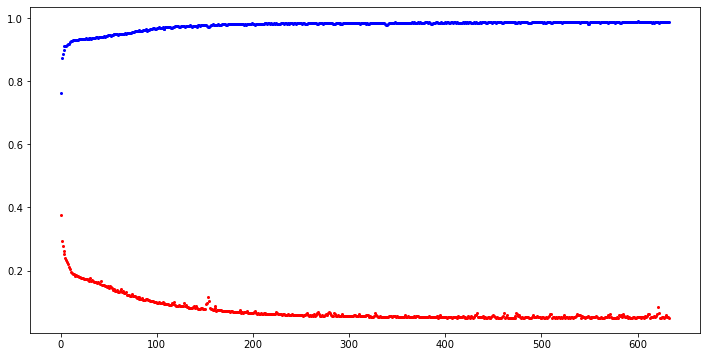

In [14]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()